In [11]:
# tato úloha bude interaktivní, zapneme si proto podporu vykreslování pomocí následujícího *magického* příkazu
%matplotlib inline

# Near Earth Object

Nejen v bezprostředním Zemském okolí se pohybuje nespočet malých těles pocházejících z bouřlivého období formování Sluneční soustavy. Pojdmě se nyní společně podívat, co všechno o nich dokážeme zjistit z jednoho souboru dostupného na Internetu. Ten o nich před více než dvěstě lety začali psát ještě skuteční lidé -- sám jsem vám jednoho osobně znal, ale časy jsou zlé i pro Kamila, a tak dnes i jejich práci převzali již roboti. Nezbývá než vzdát čest mladým odvážným můžům s výkonnými teleskopy a chabým připojením k internetu. Že jen pomocí pár kouzelných příkazů posílaných přes terminál k vykonání na vzdáleném mainframu, zvládají již celá desetiletí spravovat tento dokument:

![Mousepad](../screenshots/mousepad_2015-05-17_17-01-23.png)

Začněme tím, že si tento soubor stáhneme na vlastní počítač ze známe adresy...

In [2]:
!wget http://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT

--2015-05-29 22:26:14--  http://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT
Překládám www.minorplanetcenter.net (www.minorplanetcenter.net)… 131.142.195.59
Navazuje se spojení s www.minorplanetcenter.net (www.minorplanetcenter.net)|131.142.195.59|:80… spojeno.
HTTP požadavek odeslán, program čeká na odpověď… 200 OK
Délka: 139627090 (133M) [text/plain]
Ukládám do: „MPCORB.DAT“

MPCORB.DAT          100%[=====================>] 133,16M   120KB/s   za 23m 28s

2015-05-29 22:49:42 (96,8 KB/s) – „MPCORB.DAT“ uloženo [139627090/139627090]



Zatím co s podepřenou hlavou hypnoticky sleduji progressbar a čekám na dokončení stahování, upoutá mojí pozornost délka stahovaného souboru. Více než **100 miliónu bitů** informace uložených v prostém textovém souboru. Informace o dráhových elementech všech známých planetek v naší Sluneční soustavě. To jsou přesně ty informace, které potřebuji znát, pokud bych chtěl kdykoliv jakoukoliv planetku pozorovat vlastním dalekohledem.

Než se však pokusím takto velký soubor otevřít ve svém oblíbeném textovém editoru, napřed si z něj zobrazím několik prvních řádek. Proč zrovna 42? Prostě pro to. Stejně jako Dougles Adams, když psal *Stopařova průvodce Galaxií*, i já teď hledím do okna terminálu, který má na výšku přesně 42 řádků a to je taky přesně tolik řádků, kolik si stačí z tohoto souboru přečíst, aby jste pochopili jeho struktůru.

In [1]:
!head -n 42 MPCORB.DAT

MINOR PLANET CENTER ORBIT DATABASE (MPCORB)

This file contains published orbital elements for all numbered and unnumbered
multi-opposition minor planets for which it is possible to make reasonable
predictions.  It also includes published elements for recent one-opposition
minor planets and is intended to be complete through the last issued Daily
Orbit Update MPEC.  As such it is intended to be of interest primarily
to astrometric observers.

   Software programs may include this datafile amongst their datasets, as
   long as this header is included (it is acceptable if it is contained
   in a file separate from the actual data) and that proper attribution
   to the Minor Planet Center is given.  Credit to the individual orbit
   computers is implicit by the inclusion of a reference and the name of
   the orbit computer on each orbit record.  Information on how to obtain
   updated copies of the datafile must also be included.

   The work of the individual astrometric observers, witho

A už to vidím! Na posledním řádku, číslo 2,76..., to je přece délka velké poloosy prvně objevené trpasličí planety [Ceres](http://cs.wikipedia.org/wiki/Ceres_%28trpasli%C4%8D%C3%AD_planeta%29) vyjádřená v Astronomických jednotkách. Přesnou hodnotu Astronomické jednotky si ale nepamatuji, nicméně pokud s ní potřebuji počítat vím kde jí mám hledat.

In [14]:
from astropy import constants as C

In [15]:
C.au

<Constant name='Astronomical Unit' value=149597870700.0 error=0.0 units='m' reference='IAU 2012 Resolution B2'>

Řekněme, že mě zajímá relativní distribuce planetek v závislosti na jejich velké poloose. Jinými slovy chci vykreslit normovaný histogram. Než abych načítal celý soubor, raději si z něj vyříznu jen ten jeden sloupec, který mě v tuto chvíli zajímá. Následující příkaz přeskočí hlavičku souboru a ze zbytku vybere sloupec daný přesným rozsahem bytů. Výsledek se uloží do příhodně pojmenovaného souboru `a.dat`.

In [16]:
!tail -n +42 MPCORB.DAT | cut -b 93-103 > a.dat

Od teď už to půjde rychle. Napřed si z balíku `numpy` vytáhnu funkci pro načítání dat z textového souboru.

In [17]:
from numpy import loadtxt

Funkci jako parametr předám název souboru a data, které vrátí si uložím do proměnné symbolicky pojmenované `a`.

In [43]:
a = loadtxt("a.dat")

Standardním způsobem importuji i modul `pyplot`, který mi umožňuje dělat nevídané kouzla s grafy.

In [19]:
from matplotlib import pyplot as plt

Nyní mi již nic nebrání vykreslit relativní distribuci planetek mezi Sluncem a Jupiterem.

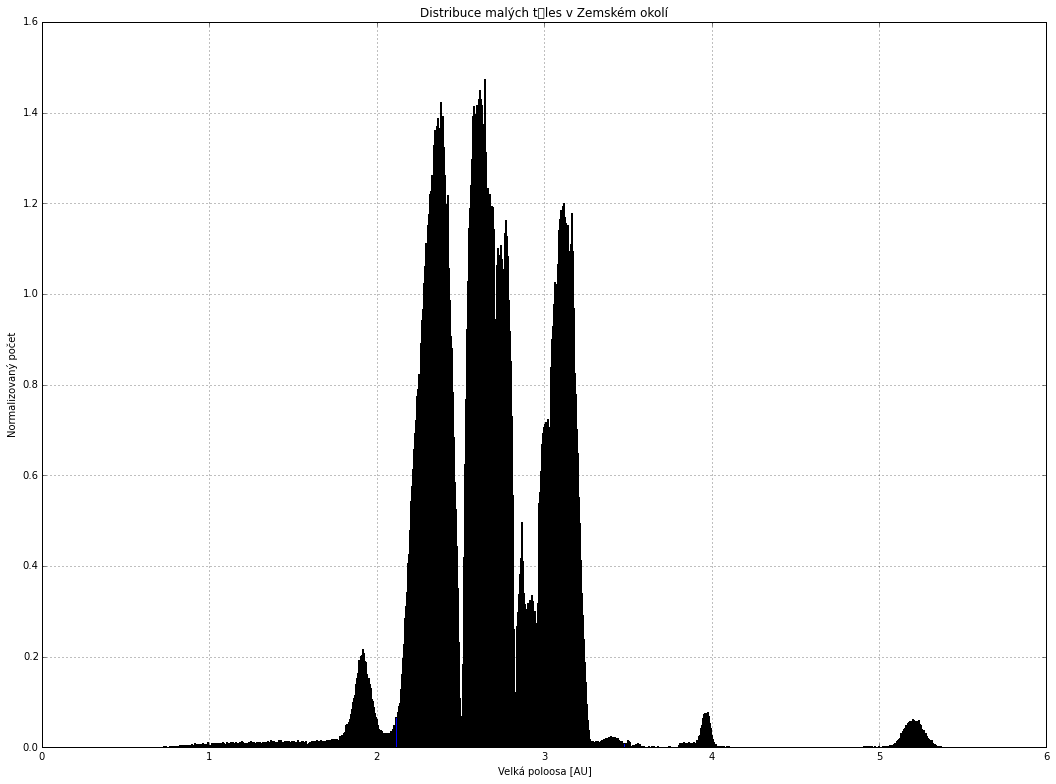

In [44]:
plt.figure(figsize=(18,13))
plt.title("Distribuce malých těles v Zemském okolí")
plt.xlabel("Velká poloosa [AU]")
plt.ylabel("Normalizovaný počet")
plt.grid(True)
_ = plt.hist(a, bins=1000, range=(0,6), normed=True)